# Simple EDA of UFC events and weightclasses

In this notebook I'm trying to make some exploritory analysis of events and weightclasses in the most popular mix martial arts promotion, the Ultimate Fighting Championship. All data used in the analysis was scraped from <a href='http://ufcstats.com/statistics/events/completed'> UFC Stats website</a>.

The analysis is done to answer some simple questions:
#### <li>Did global pandemic influenced the number of events UFC had in 2020?</li>
#### <li>Is Las Vegas really a fighting capital of the world?</li>
#### <li>What is the most exciting weigtclass to watch?</li>

First, import libraries and read the.
All data is scrapped from from <a href='http://ufcstats.com/statistics/events/completed'> UFC Stats website</a> and stored in three .csv files: <a href='events_data.csv'>events_data.csv</a> (info about the name, date and place of the event and a link to event page of UFC stats), <a href='fighters_data.csv'>fighters_data.csv</a> (general info about every fighter in UFC history including their names, fighting records (before and in UFC) and physical attributes) and <a href='fights_data.csv'>fights_data.csv</a> (info on every fight in every event starting from UFC 2 in 1994).

In [5]:
# importing the libraries for EDA
import warnings
warnings.filterwarnings('ignore')
import time
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# reading the files
events = pd.read_csv('events_data.csv')
fighters = pd.read_csv('fighters_data.csv')
fights = pd.read_csv('fights_data.csv')

Displaying first 5 rows and general info about datasets.

In [7]:
events.head()

,event name,event date,event place,event link
0,UFC 256: Figueiredo vs. Moreno,"December 12, 2020","Las Vegas, Nevada, USA",http://ufcstats.com/event-details/d0d43cb9b14f...
1,UFC Fight Night: Hermansson vs. Vettori,"December 05, 2020","Las Vegas, Nevada, USA",http://ufcstats.com/event-details/398b440e73d5...
2,UFC Fight Night: Smith vs. Clark,"November 28, 2020","Las Vegas, Nevada, USA",http://ufcstats.com/event-details/992c82450d96...
3,UFC 255: Figueiredo vs. Perez,"November 21, 2020","Las Vegas, Nevada, USA",http://ufcstats.com/event-details/bbb15f301e4a...
4,UFC Fight Night: Felder vs. Dos Anjos,"November 14, 2020","Las Vegas, Nevada, USA",http://ufcstats.com/event-details/3bc27ec15fac...


In [8]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   event name   544 non-null    object
 1   event date   544 non-null    object
 2   event place  544 non-null    object
 3   event link   544 non-null    object
dtypes: object(4)
memory usage: 17.1+ KB


In [9]:
fighters.head()

,first name,last name,nickname,link,height(ft),weight(lb),reach(inch),stance,wins,losses,draws,belt,SLpM,Str. Acc,SApM,Str. Def,TD Avg,TD Acc.,TD Def,Sub. Avg
0,Tom,Aaron,NaN,http://ufcstats.com/fighter-details/93fe7332d1...,--,155 lbs.,--,NaN,5,3,0,0,0.00,0%,0.00,0%,0.00,0%,0%,0.0
1,Danny,Abbadi,The Assassin,http://ufcstats.com/fighter-details/15df64c02b...,"5' 11""",155 lbs.,--,Orthodox,4,6,0,0,3.29,38%,4.41,57%,0.00,0%,77%,0.0
2,David,Abbott,Tank,http://ufcstats.com/fighter-details/b361180739...,"6' 0""",265 lbs.,--,Switch,10,15,0,0,1.35,30%,3.55,38%,1.07,33%,66%,0.0
3,Shamil,Abdurakhimov,Abrek,http://ufcstats.com/fighter-details/2f5cbecbbe...,"6' 3""",235 lbs.,"76.0""",Orthodox,20,5,0,0,2.45,44%,2.45,58%,1.23,24%,47%,0.2
4,Hiroyuki,Abe,Abe Ani,http://ufcstats.com/fighter-details/c0ed7b2081...,"5' 6""",145 lbs.,--,Orthodox,8,15,3,0,1.71,36%,3.11,63%,0.00,0%,33%,0.0


In [10]:
fighters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3583 entries, 0 to 3582
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   first name   3583 non-null   object 
 1   last name    3583 non-null   object 
 2   nickname     1892 non-null   object 
 3   link         3583 non-null   object 
 4   height(ft)   3583 non-null   object 
 5   weight(lb)   3583 non-null   object 
 6   reach(inch)  3583 non-null   object 
 7   stance       2779 non-null   object 
 8   wins         3583 non-null   int64  
 9   losses       3583 non-null   int64  
 10  draws        3583 non-null   int64  
 11  belt         3583 non-null   int64  
 12  SLpM         3583 non-null   float64
 13  Str. Acc     3583 non-null   object 
 14  SApM         3583 non-null   float64
 15  Str. Def     3583 non-null   object 
 16  TD Avg       3583 non-null   float64
 17  TD Acc.      3583 non-null   object 
 18  TD Def       3583 non-null   object 
 19  Sub. A

In [11]:
fights.head()

,fight date,fight weightclass,win method,rounds,time,Winner,KD W,TD succeeded W,TD attempted W,TD % W,...,str total L,sig str landed L,sig str total L,sig str % L,dist str landed L,dist str total L,clinch str landed L,clinch str total L,ground str landed L,ground str total L
0,"December 12, 2020",Flyweight,M-DEC,5,5:00,Deiveson Figueiredo,0.0,2.0,4.0,50,...,256.0,132.0,248.0,53,129.0,240.0,1.0,5.0,2.0,3.0
1,"December 12, 2020",Lightweight,U-DEC,3,5:00,Charles Oliveira,0.0,0.0,0.0,--,...,112.0,41.0,63.0,65,17.0,34.0,0.0,0.0,24.0,29.0
2,"December 12, 2020",Women's Strawweight,U-DEC,3,5:00,Mackenzie Dern,0.0,0.0,5.0,0,...,152.0,63.0,134.0,47,43.0,109.0,18.0,23.0,2.0,2.0
3,"December 12, 2020",Middleweight,KO/TKO,1,1:45,Kevin Holland,0.0,0.0,0.0,--,...,2.0,2.0,2.0,100,0.0,0.0,0.0,0.0,2.0,2.0
4,"December 12, 2020",Heavyweight,KO/TKO,2,2:34,Ciryl Gane,0.0,0.0,1.0,0,...,82.0,59.0,80.0,73,53.0,74.0,4.0,4.0,2.0,2.0


In [12]:
fights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5905 entries, 0 to 5904
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fight date           5905 non-null   object 
 1   fight weightclass    5905 non-null   object 
 2   win method           5905 non-null   object 
 3   rounds               5905 non-null   int64  
 4   time                 5905 non-null   object 
 5   Winner               5905 non-null   object 
 6   KD W                 5884 non-null   float64
 7   TD succeeded W       5884 non-null   float64
 8   TD attempted W       5884 non-null   float64
 9   TD % W               5884 non-null   object 
 10  sub attempts W       5884 non-null   float64
 11  pass W               5884 non-null   float64
 12  str landed W         5884 non-null   float64
 13  str total W          5884 non-null   float64
 14  sig str landed W     5884 non-null   float64
 15  sig str total W      5884 non-null   f

#### Let's first work with events data and try to answer two questions of this notebook. Did global pandemic influenced the number of events UFC had in 2020 and is Las Vegas, Nevada, really a fighting capital of the world?

In [13]:
# event date column in events dataframe should better be a timestamp
events['event date'] = [datetime.strptime(date, '%B %d, %Y') for date in events['event date']]

In [35]:
# create new columns to help with those questions
events['year'] = events['event date'].dt.year
events['month'] = events['event date'].dt.month
events['day'] = events['event date'].dt.day
events['weekday'] = events['event date'].dt.weekday
events['city'] = [place.split(',')[0].strip() for place in events['event place']]
events['country'] = [place.split(',')[-1].strip() for place in events['event place']]

In [15]:
# check out what we've got
events.head()

,event name,event date,event place,event link,year,month,day,weekday,city,country
0,UFC 256: Figueiredo vs. Moreno,2020-12-12,"Las Vegas, Nevada, USA",http://ufcstats.com/event-details/d0d43cb9b14f...,2020,12,12,5,Las Vegas,USA
1,UFC Fight Night: Hermansson vs. Vettori,2020-12-05,"Las Vegas, Nevada, USA",http://ufcstats.com/event-details/398b440e73d5...,2020,12,5,5,Las Vegas,USA
2,UFC Fight Night: Smith vs. Clark,2020-11-28,"Las Vegas, Nevada, USA",http://ufcstats.com/event-details/992c82450d96...,2020,11,28,5,Las Vegas,USA
3,UFC 255: Figueiredo vs. Perez,2020-11-21,"Las Vegas, Nevada, USA",http://ufcstats.com/event-details/bbb15f301e4a...,2020,11,21,5,Las Vegas,USA
4,UFC Fight Night: Felder vs. Dos Anjos,2020-11-14,"Las Vegas, Nevada, USA",http://ufcstats.com/event-details/3bc27ec15fac...,2020,11,14,5,Las Vegas,USA


In [24]:
# a function to plot the graphs
def plot_it(df,kind,figsize=(10,6)):
    """
    A function to plot quick graphs.
    df - a dataframe or a series,
    kind - graph to plot ('line','bar',etc.),
    figsize - size of the figure (default is (10,6))
    """
    plt.figure(figsize=figsize)
    return df.plot(kind=kind)

In [28]:
# number of events UFC did per year since 1994
events_per_year = events.groupby('year')['event name'].count()
events_per_year

year
1994     3
1995     4
1996     5
1997     5
1998     3
1999     6
2000     6
2001     5
2002     7
2003     5
2004     5
2005    10
2006    18
2007    19
2008    20
2009    20
2010    24
2011    27
2012    31
2013    33
2014    46
2015    41
2016    41
2017    39
2018    39
2019    42
2020    40
Name: event name, dtype: int64

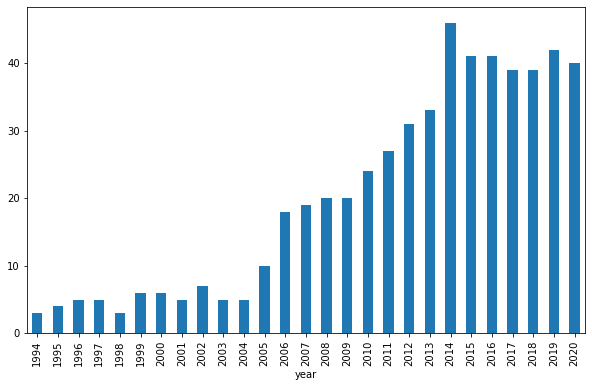

In [23]:
plot_it(df=events_per_year,kind='bar');

So, according to this graph we can see that number of events has been steadily growing since 2005 reaching more than 40 events per year in mid 2010s (46 events in 2014). That is actually not a coincidense. In 2005 UFC launched its reality show, Ultimate Fighter, on Spike TV which became a huge success and exploded UFC popularity. Since 2014 UFC has been hosting around 40 events per year which is also true for 2020. Despite global pandemic the promotion will have 41 events this year. And considering all major sports were on a lockdown, I'm sure promotion's PPV number has also been on a high level (although this information is disclosed and I cannot check it).

And just for fun, I want to have a look what is the bussiest month for UFC in general.

In [37]:
events_per_month

month
1     36
2     44
3     38
4     43
5     41
6     51
7     51
8     43
9     49
10    42
11    53
12    53
Name: event name, dtype: int64

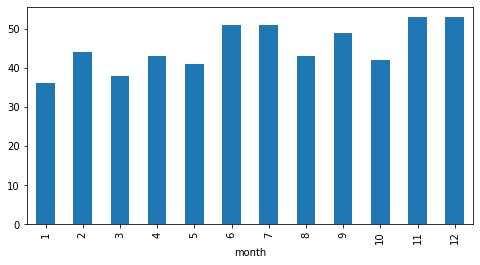

In [36]:
events_per_month = events.groupby('month')['event name'].count()
plot_it(events_per_month,'bar',(8,4));

So, bussiest month for the company are November and December with 53 events and June and July with 51 events in UFC history.

In [44]:
# number of events in UFC history (top 10) per city and per country (top 10)
events_per_city = events.groupby('city')['event name'].count().sort_values(ascending=False)[:10]
events_per_country = events.groupby('country')['event name'].count().sort_values(ascending=False)[:10]

In [45]:
events_per_city

city
Las Vegas         144
Abu Dhabi          12
London             11
Rio de Janeiro     10
Atlantic City       9
Anaheim             8
Sao Paulo           8
Newark              8
Chicago             7
Los Angeles         7
Name: event name, dtype: int64

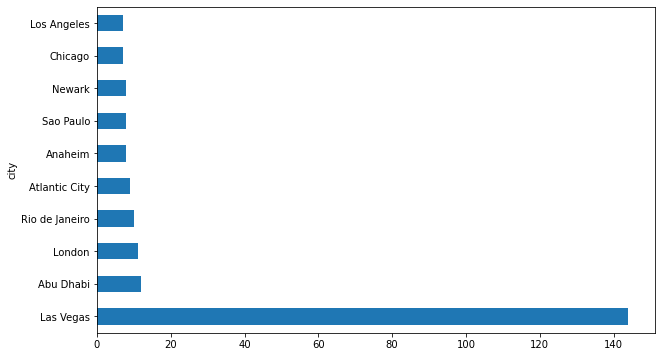

In [51]:
plot_it(events_per_city,'barh');

In [46]:
events_per_country

country
USA                     365
Brazil                   37
Canada                   31
United Kingdom           24
Australia                15
United Arab Emirates     12
Japan                     9
Mexico                    6
Sweden                    6
China                     6
Name: event name, dtype: int64

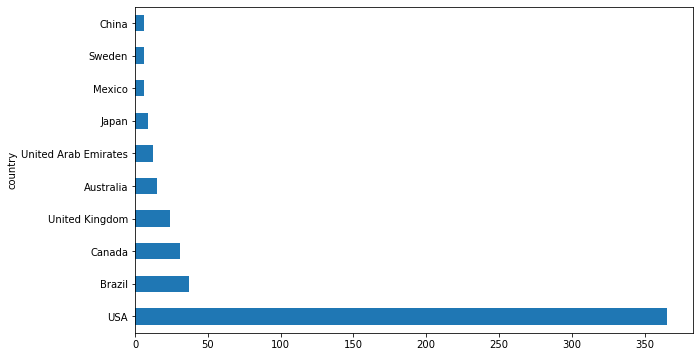

In [52]:
plot_it(events_per_country,'barh');

In [48]:
events_per_city_2020 = events[events['year']==2020].groupby('city')['event name'].count().sort_values(ascending=False)
events_per_city_2020

city
Las Vegas       22
Abu Dhabi        9
Jacksonville     3
Rio Rancho       1
Raleigh          1
Norfolk          1
Houston          1
Brasilia         1
Auckland         1
Name: event name, dtype: int64

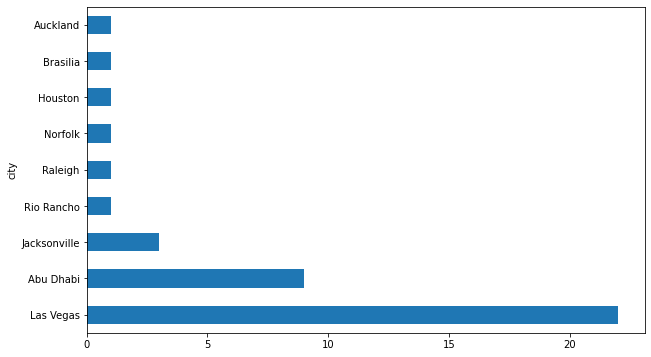

In [50]:
plot_it(events_per_city_2020,'barh');

Well, Las Vegas is indeed a fighting capital of the world (at least for mma). 144 out 365 events on US territory in UFC history were held in Las Vegas, Nevada. Second most popular is Abu Dhabi, UAE, with only 12 events hosted there, 9 of which were in 2020 when UFC announced its Fight island. Interestingly, China, the country with biggest population in the world, hosted only 6 events in promotion's history. I guess there is some room for expantion there!

Now, many people believe that the level of entartainment of the fight is measured on if there was an early stoppage. They find the fights that go the distance a little less exciting rather than if there is a KO or a submission victory. I don't think that's complety true but just to toy with that idea I want to know what weightclass in UFC has the most KO or submission victories.

In [53]:
# first, what type of victory is most common
fights['win method'].value_counts()

U-DEC         2041
KO/TKO        1956
SUB           1205
S-DEC          560
M-DEC           64
Overturned      45
DQ              17
CNC             15
Other            2
Name: win method, dtype: int64

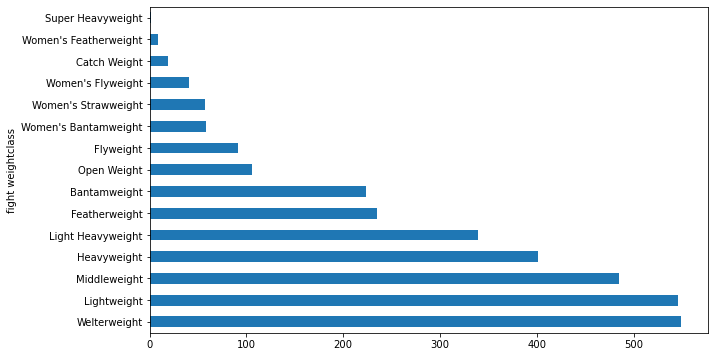

In [55]:
# a dataframe with number of early stoppage fights grouped by weightclass
early_stop = fights[(fights['win method']=='KO/TKO')|
                   (fights['win method']=='SUB')].groupby('fight weightclass')['Winner'].count().sort_values(ascending=False)
plot_it(early_stop,'barh');

If we look at this graph, it seems like most of welter- or lightweight fights don't go the distance. I think it's a bit misleading because I belive there are more fights in general in those weightclasses than, let's say, in women's featherweight.

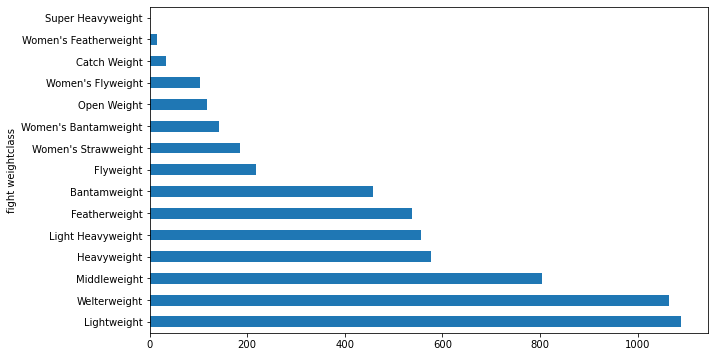

In [57]:
total_fights = fights.groupby('fight weightclass')['Winner'].count().sort_values(ascending=False)
plot_it(total_fights,'barh');

But we want to know which weightclass is more exciting. We need to find a weightclass with highest percentage of fights stopped early.

In [58]:
fights_by_weightclass = pd.concat([total_fights,early_stop], axis=1)
fights_by_weightclass.columns = ['Total fights','Stopped early']
fights_by_weightclass

,Total fights,Stopped early
Lightweight,1089,546
Welterweight,1065,549
Middleweight,805,485
Heavyweight,576,401
Light Heavyweight,556,339
Featherweight,538,235
Bantamweight,458,224
Flyweight,219,91
Women's Strawweight,186,57
Women's Bantamweight,143,58


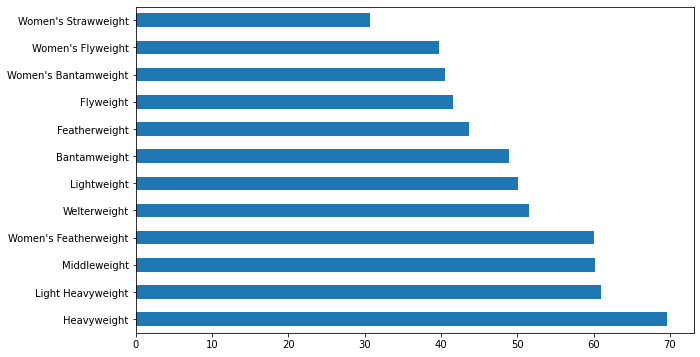

In [61]:
# and a new column to show % of fights stopped early
fights_by_weightclass['% stopped early'] = round(fights_by_weightclass['Stopped early']/fights_by_weightclass['Total fights']*100,
                                                 2)

# most exciting weightclass (drop first 2, super heavyweight and open weight, and catch weight 
# because they don't have them anymore)
exciting_weightclass = fights_by_weightclass['% stopped early'].sort_values(ascending=False)[2:].drop('Catch Weight', axis=0)
plot_it(exciting_weightclass,'barh');

So, heavyweight happens to be the most exciting weightclass in UFC with almost 70% of the fights didn't go the distance. Interestingly, in both men and women weightclasses, the bigger the fighters are the more likely the fight to be stoppage victory.

#### to be continued...